In [1]:
# Loading Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hacktest/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv
/kaggle/input/hacktrain/hacktrain.csv


In [2]:
# Loading Training Dataset
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

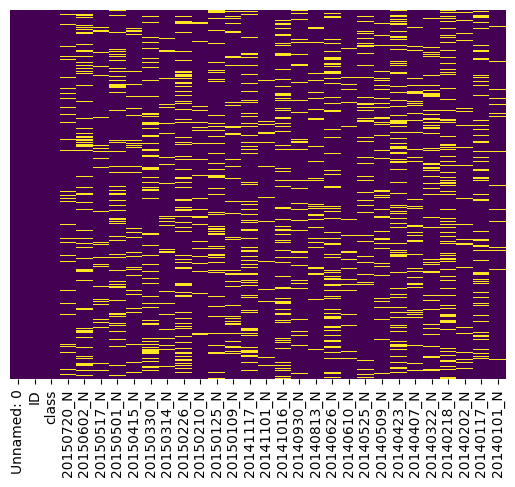

In [4]:
# Visualizing missing values for features
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [5]:
# Outlier Handling and Imputing 
X = df.drop(columns=['Unnamed: 0', 'ID', 'class'])
y = df['class']

def cap_outliers_iqr(df):
    capped_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        capped_df[col] = np.clip(df[col], lower, upper)
    return capped_df

X = cap_outliers_iqr(X)

imputer = KNNImputer(n_neighbors = 15)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
df = pd.concat([df[['Unnamed: 0', 'ID']], X, y], axis=1)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/co

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class
0,0,1,637.5950,658.668000,-1882.030000,-1924.36,997.9040,-1739.990000,630.087000,112.5148,...,-1043.160,-1942.490000,267.138,551.1106,485.785133,211.328,3752.225,-1180.190000,433.906,water
1,1,2,634.2400,593.705000,-1625.790000,-1672.32,914.1980,-692.386000,707.626000,-1670.5900,...,-933.934,-625.385000,120.059,364.8580,476.972000,220.878,3752.225,-1360.560000,524.075,water
2,3,4,58.0174,-1599.160000,-386.545527,-1052.63,347.2714,-1564.630000,-12.671073,729.7900,...,368.622,-351.752867,-1227.800,304.6210,437.945067,369.214,3752.225,76.343000,-1343.550,water
3,4,5,72.5180,-37.623333,380.436000,-1256.93,515.8050,-1413.180000,-802.942000,683.2540,...,155.624,-339.273133,-924.073,432.1500,282.833000,298.320,3752.225,130.791933,-826.727,water
4,7,8,1136.4400,955.267733,429.255293,1647.83,1935.8000,878.708397,2158.980000,541.2334,...,1959.430,-279.317000,-384.915,-113.4060,1020.720000,1660.650,3752.225,-568.050000,-1357.140,water


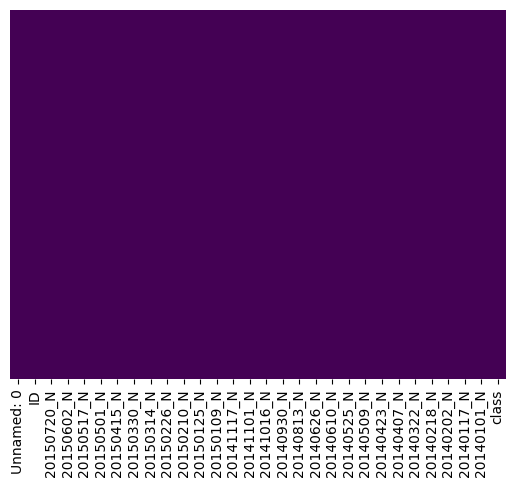

In [6]:
# Visualising missing values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [7]:
# Encoding categorical data
df.drop(['ID', 'Unnamed: 0'], axis = 1, inplace = True)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
df.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class
0,637.5950,658.668000,-1882.030000,-1924.36,997.9040,-1739.990000,630.087000,112.5148,-1325.64,-944.08400,...,-1043.160,-1942.490000,267.138,551.1106,485.785133,211.328,3752.225,-1180.190000,433.906,5
1,634.2400,593.705000,-1625.790000,-1672.32,914.1980,-692.386000,707.626000,-1670.5900,-1408.64,-989.28500,...,-933.934,-625.385000,120.059,364.8580,476.972000,220.878,3752.225,-1360.560000,524.075,5
2,58.0174,-1599.160000,-386.545527,-1052.63,347.2714,-1564.630000,-12.671073,729.7900,-3162.14,-797.69894,...,368.622,-351.752867,-1227.800,304.6210,437.945067,369.214,3752.225,76.343000,-1343.550,5
3,72.5180,-37.623333,380.436000,-1256.93,515.8050,-1413.180000,-802.942000,683.2540,-2829.40,-1267.54000,...,155.624,-339.273133,-924.073,432.1500,282.833000,298.320,3752.225,130.791933,-826.727,5
4,1136.4400,955.267733,429.255293,1647.83,1935.8000,878.708397,2158.980000,541.2334,1242.87,-2646.05000,...,1959.430,-279.317000,-384.915,-113.4060,1020.720000,1660.650,3752.225,-568.050000,-1357.140,5


In [8]:
# Defining feature and target variables
X = df.drop('class', axis = 1)
y = df['class']

In [9]:
# Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000)

In [10]:
# Scaling Train and Test data separately
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train_scaled = X_train_scaled.clip(lower=-1, upper=1)
df = pd.concat([X_train_scaled, y], axis=1)
X_train_scaled

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.000607,0.540591,0.518617,0.235779,1.000000,0.195083,-0.291997,0.264237,0.602405,0.337731,...,-0.028450,-0.396377,-0.021767,-0.653944,1.000000,0.143118,1.000000,0.357048,1.000000,-0.039333
1,-1.000000,-0.548729,-0.232573,0.116968,-0.224956,0.449047,-0.360959,-0.741877,-0.311705,0.294231,...,-0.546682,-0.625814,-0.368866,0.337184,-0.357008,-0.089644,-0.102818,0.088674,-0.130483,0.095938
2,0.151391,-0.970579,0.373218,0.499128,-0.215372,-1.000000,-0.477954,-0.405302,-0.555744,-1.000000,...,-0.898798,0.767040,-0.493027,0.563683,-0.348741,0.858978,-0.210802,0.101978,-0.340821,-0.200647
3,0.098827,0.321798,0.043051,0.286371,0.873734,0.077483,0.818568,-0.164920,0.505640,-0.057887,...,-0.636181,0.491721,-0.630860,0.020931,0.083213,-0.184625,-0.048288,0.405691,0.019218,0.862100
4,-0.167642,-0.016062,-0.471065,0.483112,0.150495,-0.271532,-0.446479,-0.261317,0.117351,0.158848,...,0.461140,-0.617593,0.365107,-0.211985,-0.106605,-0.058617,-0.045634,-0.172791,-0.174605,0.240873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.420498,-0.979770,-0.465608,0.541839,-0.075876,-0.465517,1.000000,-1.000000,-0.587163,0.116208,...,-0.227151,0.561397,-0.338320,0.050931,1.000000,0.133173,0.503576,0.403657,-0.319743,-0.178869
6396,-0.520354,-0.810181,-0.443994,-0.757380,0.577937,-0.458838,0.504622,-0.081708,-0.097422,-0.822639,...,-0.776160,-0.086024,-0.128358,-0.180799,0.265475,-0.165944,-0.089550,-1.000000,0.802322,0.589742
6397,0.189449,0.543222,0.320746,-0.130619,0.600385,-0.824755,0.021616,-0.730601,0.216117,-0.065401,...,0.496683,0.644301,0.377162,0.697272,0.773435,-0.122906,1.000000,-0.250644,0.913175,0.493145
6398,-0.800426,0.438574,0.455894,0.205947,0.980658,0.096419,0.766175,0.336379,0.430142,0.190061,...,0.428572,0.688641,0.099353,-0.434454,1.000000,0.349447,1.000000,0.075117,1.000000,1.000000


In [11]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
X_test_scaled = X_test_scaled.clip(lower=-1, upper=1)
df = pd.concat([X_test_scaled, y], axis=1)
X_test_scaled

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.272996,0.341597,-0.047490,-0.300938,0.776567,0.172448,-0.337904,-0.092689,0.501214,0.222585,...,-0.915186,0.471311,-0.353861,0.838381,1.000000,1.000000,1.000000,0.105818,1.000000,1.000000
1,0.328879,0.347452,0.052688,0.242767,0.886627,0.154038,0.016744,0.406720,0.481321,0.232562,...,0.333495,-0.214023,-0.015377,-0.444580,1.000000,-0.275047,0.457807,0.636356,1.000000,1.000000
2,0.107387,0.393932,0.458929,0.494058,0.762259,-0.427960,1.000000,0.295326,0.094101,0.178233,...,0.321756,0.710386,0.177075,-0.264104,0.101950,1.000000,0.295931,-1.000000,0.218436,1.000000
3,-0.227180,-0.825072,-0.735424,-0.599348,-0.105963,-0.498877,0.918806,0.248617,-0.175467,0.200057,...,-0.792434,-0.464747,0.489951,0.401876,0.396986,0.307287,-0.055031,0.511461,-0.179599,0.153834
4,0.289803,-0.887431,-0.564106,0.016827,-0.264427,-1.000000,-0.529742,-0.380183,-0.619878,-1.000000,...,-0.092408,-0.590640,-0.039964,-0.381960,-0.015847,-0.273545,-0.254848,0.448713,-0.281499,-0.064046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.005007,0.447950,-0.281569,-0.535233,-0.005917,0.483532,-0.047087,-0.143131,-0.076767,-1.000000,...,0.151376,0.173193,0.554302,0.883321,1.000000,-0.241970,-0.158401,-0.428102,0.427726,0.050385
1596,0.203636,0.468571,0.501382,0.503669,1.000000,0.501292,-0.341842,0.139009,0.429103,0.244117,...,0.365147,-0.671095,0.227563,0.917832,1.000000,0.439732,0.058395,0.391232,0.926916,-0.057056
1597,-1.000000,-0.693405,-0.378474,-0.919713,-0.257939,-1.000000,-0.315284,-0.798199,-0.414800,-0.775428,...,-0.473006,-0.335700,0.080033,-0.431807,0.505954,-0.282552,-0.065449,-1.000000,0.242349,0.622985
1598,0.224181,0.400110,-0.733841,0.388046,1.000000,0.402501,1.000000,-0.311834,0.532838,0.152379,...,0.459405,0.307814,-0.486222,1.000000,1.000000,-0.037149,0.884571,0.542442,1.000000,-0.269189


In [12]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [13]:
# Model score on testing subset
model.score(X_test_scaled, y_test)

0.906875

In [14]:
# Model Coefficients
model.coef_

array([[-9.41394400e-01, -4.97086585e-01, -7.45216259e-01,
        -6.97110236e-02,  3.91443217e-01,  1.01326767e+00,
         7.05766987e-01,  6.35443595e-01,  1.21993704e-01,
        -1.23866129e+00,  2.34821107e-01, -3.62873176e-01,
         4.54654073e-02, -8.87012915e-01,  3.79748336e-01,
        -3.47256234e-01,  4.21058706e-01,  6.99041513e-02,
        -1.92392208e-02,  3.88799894e-01,  6.60700565e-01,
         5.70422479e-01,  9.90377070e-02, -5.64443075e-01,
         1.07029380e-02, -5.01862891e-01, -5.92699337e-02],
       [ 9.75299785e-01,  8.47858125e-01,  9.17574232e-01,
         1.25146661e-01,  4.81210332e-01,  2.30217472e-01,
        -3.38244377e-01,  3.83218587e-01, -5.52859289e-01,
         1.24291407e+00,  1.43860393e-01, -1.06125774e+00,
        -9.35254885e-01, -1.96142979e-02, -4.34628545e-01,
         1.49346906e-01, -2.25082477e-01,  1.00379025e+00,
         2.07575505e-01, -7.40528818e-01, -1.08672557e-01,
         2.21424881e-03,  5.38982802e-01,  1.03779371e+

In [15]:
# Model intercepts for each class
model.intercept_

array([ 1.15435521,  6.2826982 , -0.78271799, -2.29345591, -2.01630286,
       -2.34457666])

In [16]:
# Confusion matrix for predicted values
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_pred, y_test))

[[ 105   22    0    6    0    3]
 [  57 1201   17    7    6    0]
 [   2    2   14    2    0    0]
 [   4    7    8  119    0    6]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0   12]]


In [17]:
# Classification Report
print(classification_report(y_pred, y_test, labels=list(range(len(label_encoder.classes_))), target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        farm       0.62      0.77      0.69       136
      forest       0.97      0.93      0.95      1288
       grass       0.36      0.70      0.47        20
  impervious       0.89      0.83      0.86       144
     orchard       0.00      0.00      0.00         0
       water       0.57      1.00      0.73        12

    accuracy                           0.91      1600
   macro avg       0.57      0.71      0.62      1600
weighted avg       0.93      0.91      0.91      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Loading Testing Dataset
test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_data.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [19]:
# Storing IDs separately for setting index of predictions later
ids = test_data['ID']# Evaluating shape of Test Data
test_data.shape

(2845, 29)

In [20]:
# Dropping ID Column
test_data.drop(['ID', 'Unnamed: 0'], axis = 1, inplace = True)
test_data.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [21]:
# Removing Outliers, Imputing and Scaling Test Data
test_data = cap_outliers_iqr(test_data)
test_data_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)
test_data_scaled = pd.DataFrame(scaler.transform(test_data_imputed), columns=test_data.columns)
test_data_scaled = test_data_scaled.clip(lower=-1, upper=1)
test_data_scaled.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.201601,-0.958596,0.214763,-0.043474,-0.245838,-0.369785,0.064603,0.252765,-0.295674,0.027943,...,-0.971770,-0.657361,0.801493,1.000000,-0.315057,0.281849,-0.181698,-1.000000,-0.287362,1.000000
1,0.129105,0.087358,-0.621691,0.070297,-0.032321,0.212889,-0.070072,-1.000000,0.469968,0.063212,...,-0.071082,0.340859,1.000000,0.653637,1.000000,-0.121676,0.780573,0.010562,-0.157806,-0.189455
2,0.188636,0.260803,-0.595117,0.397929,-0.175528,0.420061,-0.462588,-0.925233,0.424160,-0.111762,...,-0.747144,0.604163,1.000000,0.895818,1.000000,0.031803,0.401335,0.000363,-0.167173,-0.192749
3,0.092682,-0.713397,0.312119,0.158522,-0.250269,0.310517,-0.269818,0.290553,-0.408186,-1.000000,...,-0.941668,0.506063,-0.668569,0.856937,-0.224125,-0.273053,0.082145,-0.143682,-0.225779,1.000000
4,0.218264,0.476585,-0.541291,0.514400,-0.149015,0.482298,0.301429,-1.000000,0.587808,0.296016,...,0.329102,0.793537,1.000000,0.568151,1.000000,-0.072147,0.775652,0.748553,0.059880,-0.036557


In [22]:
# Predicting Test Data
y_test = model.predict(test_data_scaled)
y_test

array([0, 1, 4, ..., 5, 3, 3])

In [23]:
# Decoding Encoded Predictions
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['farm', 'forest', 'orchard', ..., 'water', 'impervious',
       'impervious'], dtype=object)

In [24]:
# Formatting Prediction sinto Pandas DataFrame
result = pd.DataFrame({'class': y_decoded}).reset_index()
result = pd.concat([ids, result], axis = 1)
result = result.drop(columns = ['index'])
result.head()

,ID,class
0,1,farm
1,2,forest
2,3,orchard
3,4,forest
4,5,forest


In [25]:
# Formatting Predictions into csv format
result.to_csv("submission.csv", index=False) 